In [1]:
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [2]:
dataset=r'F:\Coronavirus_Detection_using_Chest_X_ray-master\Data'

In [3]:
INIT_LR = 1e-3
EPOCHS = 10
BS = 8

In [4]:
args={}
args["dataset"]=dataset


In [5]:
args

{'dataset': 'F:\\Coronavirus_Detection_using_Chest_X_ray-master\\Data'}

In [6]:
import numpy as np
import cv2
iPaths = list(paths.list_images(args["dataset"]))  #image paths
data = []
labels = []
for iPath in iPaths:
    label = iPath.split(os.path.sep)[-2]   #split the image paths
    image = cv2.imread(iPath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))  #Resizing the images
    data.append(image)
    labels.append(label)
data = np.array(data) / 255.0
labels = np.array(labels)

In [7]:
image[10]

array([[122, 122, 122],
       [112, 112, 112],
       [107, 107, 107],
       [100, 100, 100],
       [ 94,  94,  94],
       [ 78,  78,  78],
       [ 68,  68,  68],
       [ 90,  90,  90],
       [ 80,  80,  80],
       [ 79,  79,  79],
       [ 86,  86,  86],
       [ 82,  82,  82],
       [ 79,  79,  79],
       [ 83,  83,  83],
       [ 82,  82,  82],
       [ 88,  88,  88],
       [ 84,  84,  84],
       [ 88,  88,  88],
       [ 91,  91,  91],
       [ 90,  90,  90],
       [ 89,  89,  89],
       [ 91,  91,  91],
       [ 95,  95,  95],
       [ 97,  97,  97],
       [104, 104, 104],
       [108, 108, 108],
       [111, 111, 111],
       [114, 114, 114],
       [115, 115, 115],
       [114, 114, 114],
       [111, 111, 111],
       [110, 110, 110],
       [107, 107, 107],
       [103, 103, 103],
       [ 97,  97,  97],
       [ 89,  89,  89],
       [ 81,  81,  81],
       [ 80,  80,  80],
       [ 83,  83,  83],
       [ 84,  84,  84],
       [ 84,  84,  84],
       [ 84,  84

In [8]:
image.shape

(224, 224, 3)

In [9]:
data

array([[[[0.52156863, 0.52156863, 0.52156863],
         [0.47843137, 0.47843137, 0.47843137],
         [0.45098039, 0.45098039, 0.45098039],
         ...,
         [0.5254902 , 0.5254902 , 0.5254902 ],
         [0.52156863, 0.52156863, 0.52156863],
         [0.99607843, 0.99607843, 0.99607843]],

        [[0.41568627, 0.41568627, 0.41568627],
         [0.36470588, 0.36470588, 0.36470588],
         [0.34509804, 0.34509804, 0.34509804],
         ...,
         [0.49411765, 0.49411765, 0.49411765],
         [0.48627451, 0.48627451, 0.48627451],
         [0.99607843, 0.99607843, 0.99607843]],

        [[0.21568627, 0.21568627, 0.21568627],
         [0.18039216, 0.18039216, 0.18039216],
         [0.18823529, 0.18823529, 0.18823529],
         ...,
         [0.4745098 , 0.4745098 , 0.4745098 ],
         [0.45490196, 0.45490196, 0.45490196],
         [0.99607843, 0.99607843, 0.99607843]],

        ...,

        [[0.96862745, 0.96862745, 0.96862745],
         [0.95294118, 0.95294118, 0.95294118]

In [10]:
labels

array(['Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 

In [11]:
import os
Data_Dir = r"F:\Coronavirus_Detection_using_Chest_X_ray-master\Data//"

In [12]:
Cimages = os.listdir(Data_Dir+"Covid")
Nimages = os.listdir(Data_Dir+"Normal")

Normal Chest X-ray Vs Covid-19 Chest X-ray


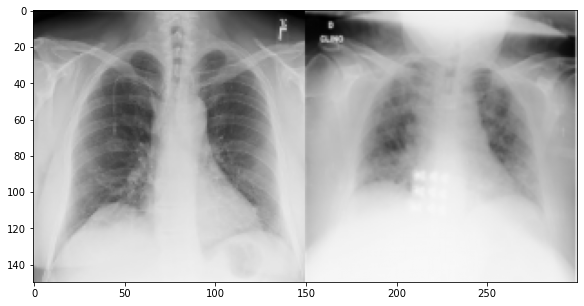

Normal Chest X-ray Vs Covid-19 Chest X-ray


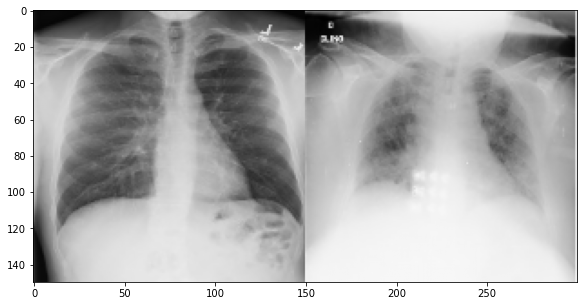

Normal Chest X-ray Vs Covid-19 Chest X-ray


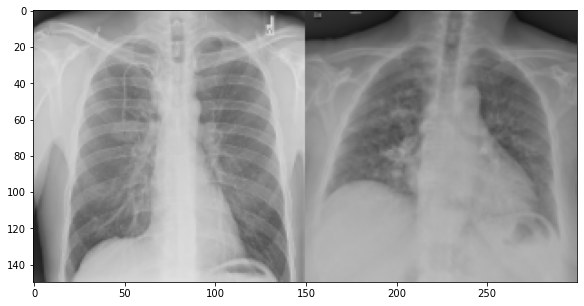

Normal Chest X-ray Vs Covid-19 Chest X-ray


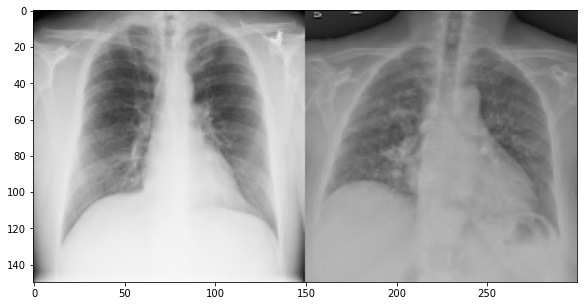

Normal Chest X-ray Vs Covid-19 Chest X-ray


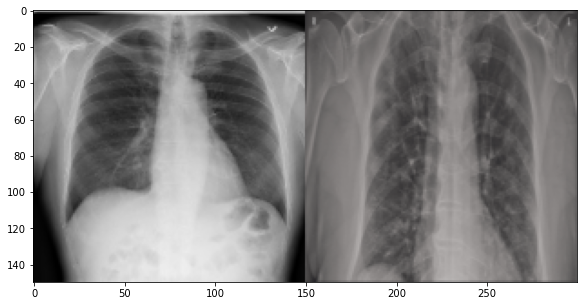

In [13]:
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.transform import resize
import numpy as np
def plotter(i):
    normal = cv2.imread(Data_Dir+"Normal//"+Nimages[i])
    normal = skimage.transform.resize(normal, (150, 150, 3))
    coronavirus = cv2.imread(Data_Dir+"Covid//"+Cimages[i])
    coronavirus = skimage.transform.resize(coronavirus, (150, 150, 3) , mode = 'reflect')
    pair = np.concatenate((normal, coronavirus), axis=1)
    print("Normal Chest X-ray Vs Covid-19 Chest X-ray")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)

In [14]:
LB = LabelBinarizer()  #Initialize label binarizer
labels = LB.fit_transform(labels)
labels = to_categorical(labels); print(labels)
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels,
    test_size=0.20, stratify=labels, random_state=42)
trainAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest")

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

In [15]:
bModel = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))  #base_Model
hModel = bModel.output #head_Model
hModel = AveragePooling2D(pool_size=(4, 4))(hModel)
hModel = Flatten(name="flatten")(hModel)
hModel = Dense(64, activation="relu")(hModel)
hModel = Dropout(0.5)(hModel)
hModel = Dense(2, activation="softmax")(hModel)
model = Model(inputs=bModel.input, outputs=hModel)
for layer in bModel.layers:
    layer.trainable = False

In [16]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((101, 224, 224, 3), (26, 224, 224, 3), (101, 2), (26, 2))

E:\anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


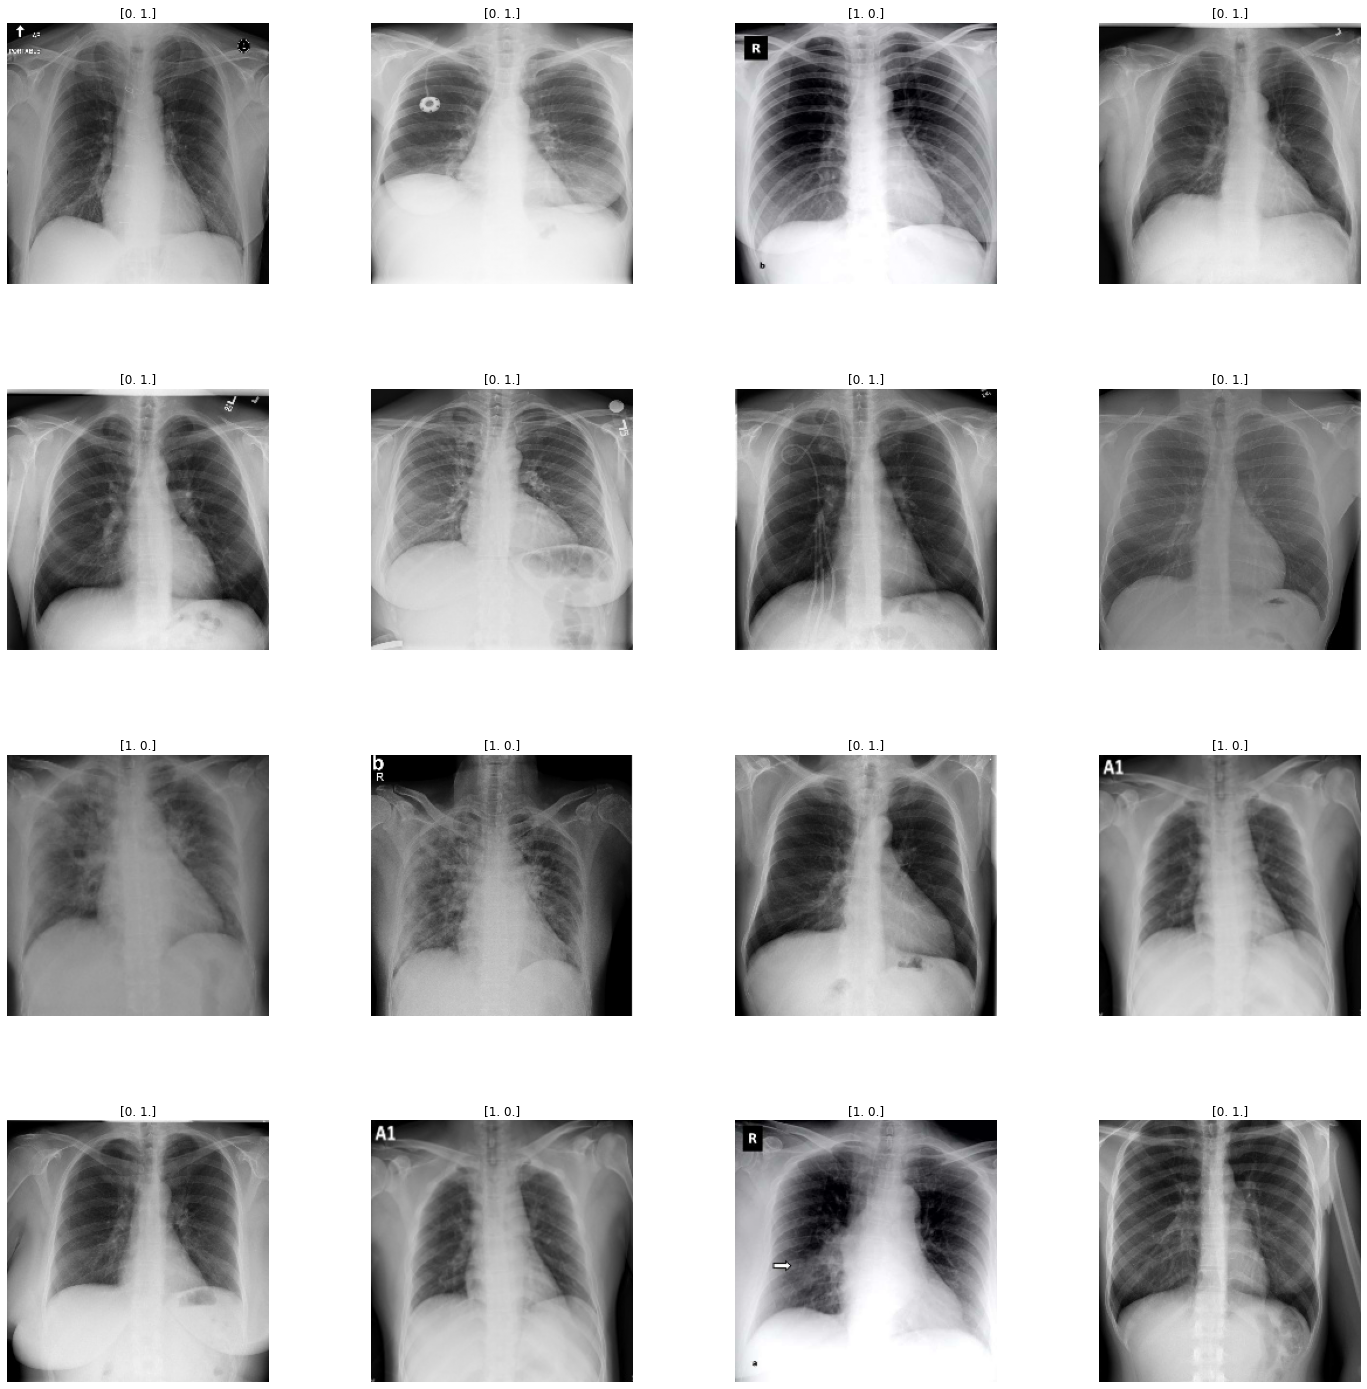

In [17]:
W_grid = 4 #width
L_grid = 4 #lenth
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25)) #subplots
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [18]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
print("Compiling Starts")
R = model.fit_generator(
    trainAug.flow(X_train, Y_train, batch_size=BS),
    steps_per_epoch=len(X_train) // BS,
    validation_data=(X_test, Y_test),
    validation_steps=len(X_test) // BS,
    epochs=EPOCHS)

Compiling Starts
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
12/12 [==============================] - 14s 1s/step - loss: 0.8548 - accuracy: 0.4479 - val_loss: 0.8121 - val_accuracy: 0.5769
Epoch 2/10
12/12 [==============================] - 14s 1s/step - loss: 0.8503 - accuracy: 0.5054 - val_loss: 0.6720 - val_accuracy: 0.5000
Epoch 3/10
12/12 [==============================] - 14s 1s/step - loss: 0.6650 - accuracy: 0.5699 - val_loss: 0.6495 - val_accuracy: 0.5385
Epoch 4/10
12/12 [==============================] - 14s 1s/step - loss: 0.6018 - accuracy: 0.6989 - val_loss: 0.6288 - val_accuracy: 0.6154
Epoch 5/10
12/12 [==============================] - 15s 1s/step - loss: 0.6178 - accuracy: 0.6458 - val_loss: 0.6056 - val_accuracy: 0.6154
Epoch 6/10
12/12 [==============================] - 15s 1s/step - loss: 0.5568 - accuracy: 0.6989 - val_loss: 0.5943 - val_accuracy: 0.6923
Epoch 7/10
12/12 [==============================] - 15s 1s/step - l

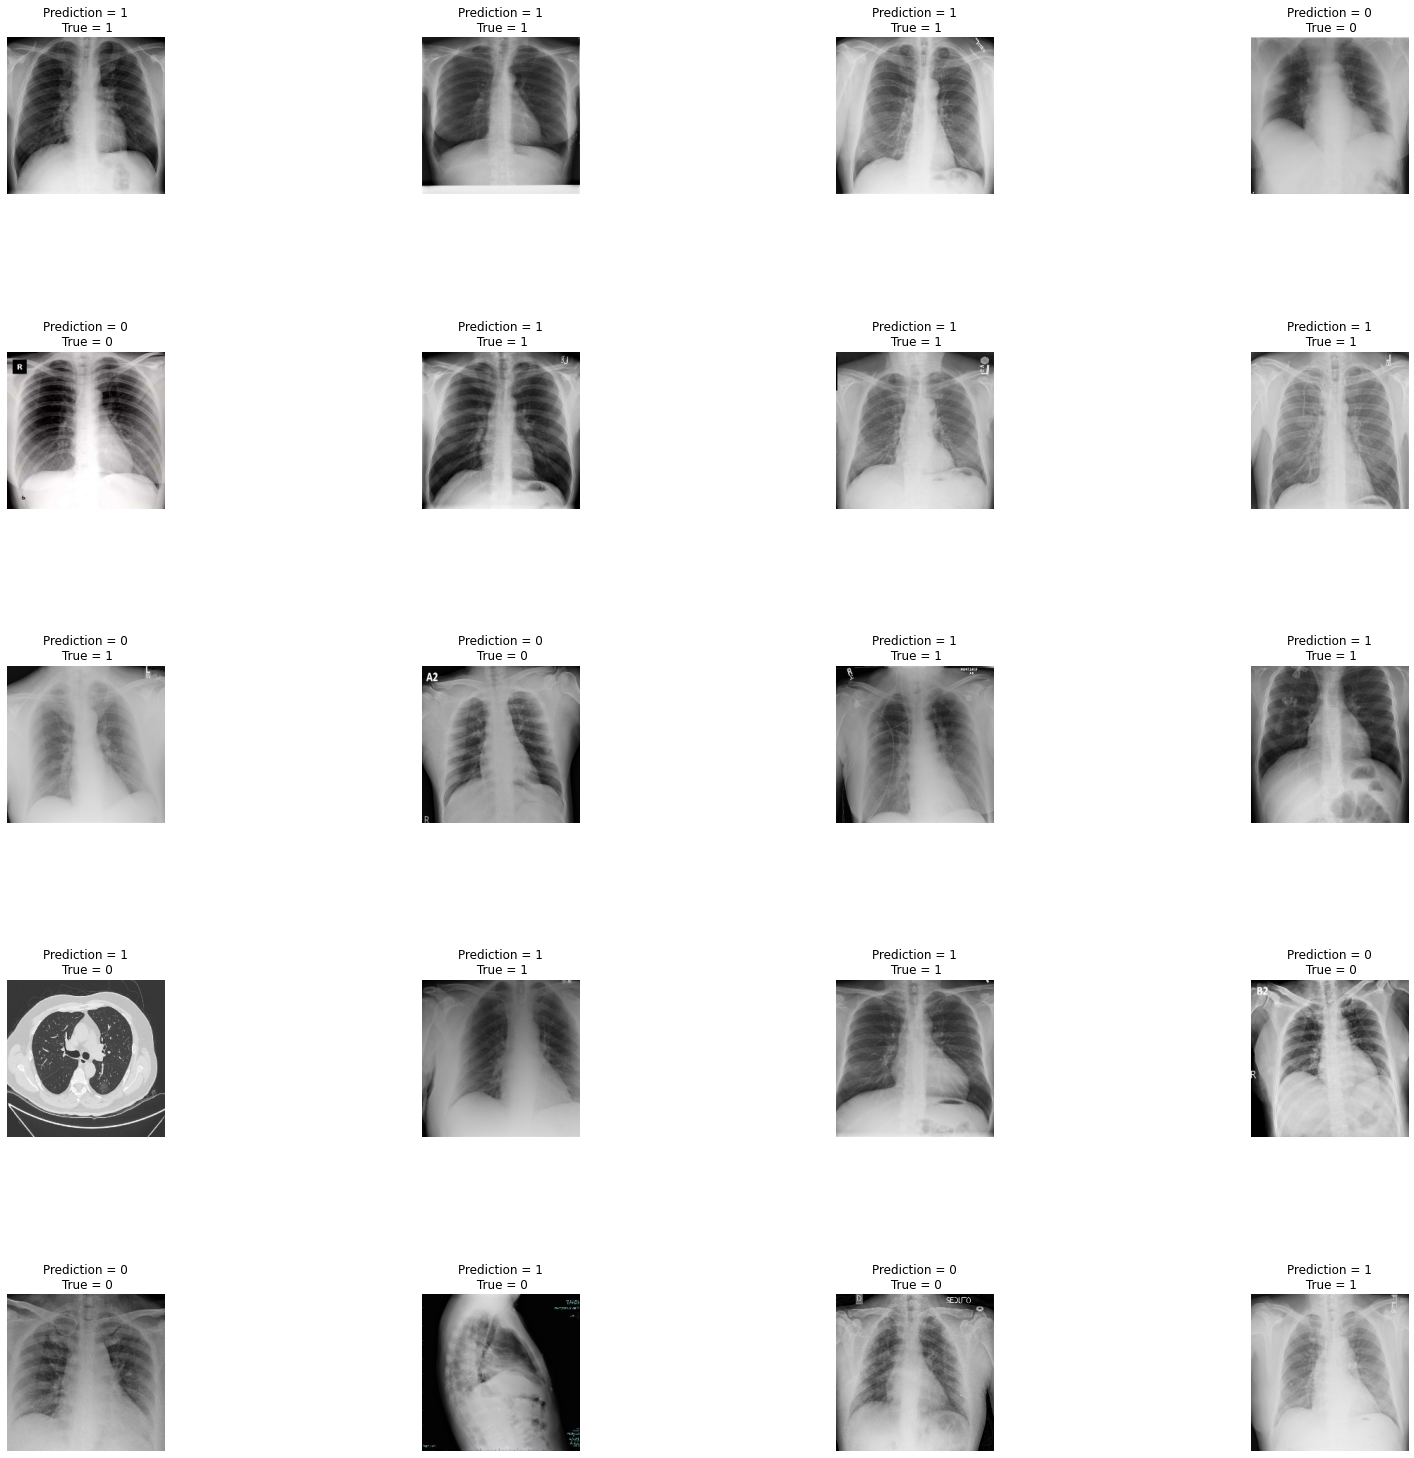

In [19]:
L =5 
W =4
fig, axes = plt.subplots(L, W, figsize = (26, 26))
axes = axes.ravel()
y_pred = model.predict(X_test, batch_size=BS)
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(y_pred.argmax(axis=1)[i], Y_test.argmax(axis=1)[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1, hspace=1)

In [20]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test, batch_size=BS)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(Y_test.argmax(axis=1), y_pred,target_names=LB.classes_))

              precision    recall  f1-score   support

       Covid       0.88      0.64      0.74        11
      Normal       0.78      0.93      0.85        15

    accuracy                           0.81        26
   macro avg       0.83      0.78      0.79        26
weighted avg       0.82      0.81      0.80        26



In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test.argmax(axis=1),y_pred)

0.8076923076923077

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[ 7  4]
 [ 1 14]]
acc: 0.8077
sensitivity: 0.6364
specificity: 0.9333


Corona


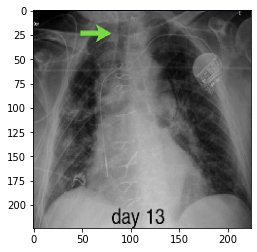

In [33]:
from keras.preprocessing import image
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
img = image.load_img(r'F:\Coronavirus_Detection_using_Chest_X_ray-master\Data\Covid\4-x-day13.jpg', target_size=(224, 224)) #insert a random covid-19 x-ray image
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
  print('Normal')
else:
  print('Corona')

Normal


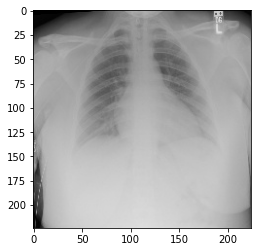

In [34]:
img = image.load_img(r'F:\Coronavirus_Detection_using_Chest_X_ray-master\Data\Normal\0a48e8eb-2c55-46ac-82b0-9bea6c5b7872.jpg', target_size=(224, 224)) #insert a random covid-19 x-ray image
imgplot = plt.imshow(img)
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
  print('Normal')
else:
  print('Corona')